<a href="https://colab.research.google.com/github/Alokathilakarathna/ME422_B3/blob/main/Vibration%20Lab/e20443.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vibration**

#TecQuipment - Vibration Analyser

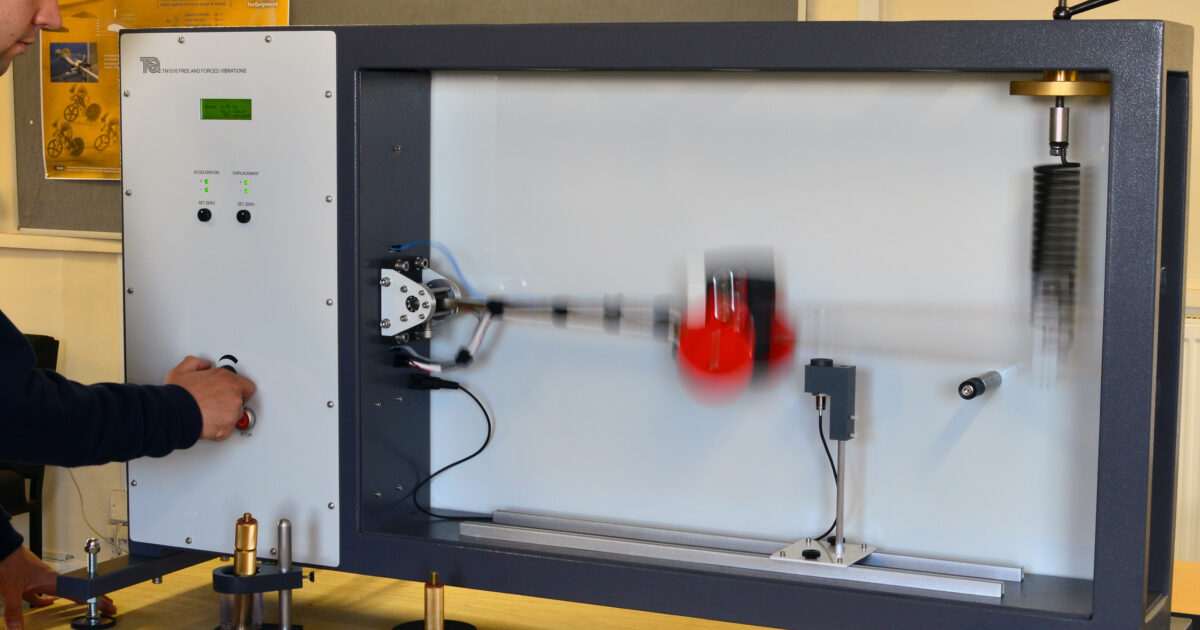

# Activity 1

Derive the 2-dof freedom model that will capture the first two dominant modes of small amplitude vibration of the system.

**Two main modes for the system**
1. Rigid Body Mode :
(The whole beam rotating about the pin.)
2. First Bending Mode : (The beam Fixing like a bow)

**System variables**
*   $x$ : Position along the beam ($0$ at pin, $L$ at spring).
*   $t$ : Time.
*   $w(x,t)$: Transverse deflection of the beam.
*   $\theta(t)$: Motor angle ($\omega t$).
*   $m_u, e$: Unbalanced mass and eccentricity.
*   $M_m$: Mass of motor assembly at $x_m$.
*   $k$: Spring stiffness at $x=L$.
*   $c$: Damping coefficient at $x_d$.

**Generalized Coordinates & Shape Functions**

 Approximate the deflection $w(x,t)$ as a sum of two shape functions $\psi(x)$ and generalized coordinates $q(t)$:$$w(x,t) = \psi_1(x)q_1(t) + \psi_2(x)q_2(t)$$
 * Mode 1 ($\psi_1$ - Rigid): Linear rotation about the pin. $$\psi_1(x) = \frac{x}{L}$$
 * Mode 2 ($\psi_2$ - Flexible): First bending mode of a pinned-free beam. A simple approximation is $$\psi_2(x) = \sin(\frac{\pi x}{L})$$

**Kinetic Energy ($T$)**

 Kinetic energy comes from the beam's distributed mass and the discrete mass of the motor.$$T = \frac{1}{2} \int_0^L \rho A \left( \frac{\partial w}{\partial t} \right)^2 dx + \frac{1}{2} M_m \left( \frac{\partial w(x_m, t)}{\partial t} \right)^2$$

 * $\rho A$: Mass per unit length of the beam.
 * $M_m$: Mass of the motor assembly.
 * $x_m$: Location of the motor.

Substituting $w(x,t)$ leads to the Mass Matrix ($M$):
$$M = \begin{bmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \end{bmatrix}$$
* Rotational Inertia
$m_{11} = \frac{\rho A L}{3} + M_m \left(\frac{x_m}{L}\right)^2$
* Bending Inertia
$m_{22} = \frac{\rho A L}{2} + M_m \sin^2\left(\frac{\pi x_m}{L}\right)$
* Coupling term $m_{12} = m_{21} = \frac{\rho A L}{\pi} + M_m \frac{x_m}{L} \sin\left(\frac{\pi x_m}{L}\right)$

**Potential Energy ($V$)**

Potential energy comes from the support spring ($k_s$) at the tip ($x=L$) and the elastic strain energy of the beam bending ($EI$).

$$V = \frac{1}{2} k_s [w(L,t)]^2 + \frac{1}{2} \int_0^L EI \left( \frac{\partial^2 w}{\partial x^2} \right)^2 dx$$

Substituting shape functions leads to the Stiffness Matrix ($K$):

$$K = \begin{bmatrix} k_{11} & k_{12} \\ k_{21} & k_{22} \end{bmatrix}$$

* $k_{11} = k_s (1)^2 = k_s$ (Spring stiffness dominates the rigid mode)

* $k_{22} = k_s \sin^2(\pi) + \frac{EI \pi^4}{2L^3} \approx \frac{EI \pi^4}{2L^3}$ (Bending stiffness)

* $k_{12} = k_{21} \approx 0$ (Assuming the spring doesn't resist the sine mode curvature significantly at the node).

**Generalized Force ($Q$)**

The excitation is the centrifugal force from the rotating unbalance:

$$F(t) = m_u e \omega^2 \sin(\omega t)$$

$$Q = \begin{bmatrix} Q_1 \\ Q_2 \end{bmatrix} = F(t) \begin{bmatrix} \psi_1(x_m) \\ \psi_2(x_m) \end{bmatrix} = m_u e \omega^2 \sin(\omega t) \begin{bmatrix} \frac{x_m}{L} \\ \sin\left(\frac{\pi x_m}{L}\right) \end{bmatrix}$$

**Final Equations of Motion**

$$\begin{bmatrix} m_{11} & m_{12} \\ m_{12} & m_{22} \end{bmatrix} \begin{bmatrix} \ddot{q}_1 \\ \ddot{q}_2 \end{bmatrix} + \begin{bmatrix} c_{11} & 0 \\ 0 & c_{22} \end{bmatrix} \begin{bmatrix} \dot{q}_1 \\ \dot{q}_2 \end{bmatrix} + \begin{bmatrix} k_{11} & 0 \\ 0 & k_{22} \end{bmatrix} \begin{bmatrix} q_1 \\ q_2 \end{bmatrix} = \begin{bmatrix} Q_1 \\ Q_2 \end{bmatrix}$$

#

#Activity 2

Estimate the damping ratios of the first two dominant modes.

**1. Logarithmic Decrement ($\delta$)**

measure how much the amplitude decreases from one peak to the next

$$\delta = \frac{1}{n} \ln\left( \frac{x_0}{x_n} \right)$$

* $x_0$: Height of the first peak you measure.

* $x_n$: Height of the $n$-th peak after $x_0$.

* $n$: Number of cycles between the two peaks.

**Damping ($\zeta$) for small damping**

$$\zeta = \frac{\delta}{\sqrt{4\pi^2 + \delta^2}} \approx \frac{\delta}{2\pi} \quad$$

**2. Half-Power Bandwidth**

look at the "width" of the resonance peak. A sharper peak means less damping. A wider peak means more damping.

Half Power amplitude:

$$A_{hp} = \frac{A_{max}}{\sqrt{2}} \approx 0.707 \cdot A_{max}$$

**Damping ($\zeta$)**

$$\zeta = \frac{\omega_2 - \omega_1}{2 \omega_n}$$



In [2]:
import numpy as np

# LAB DATA

# --- DATA FOR MODE 1 (Log Decrement Method) ---
# Look at your "Unforced Response" plot or oscilloscope data
x_0 = 15.0  # Amplitude of the first peak (e.g., mm or Volts)
x_n   = 8.5   # Amplitude of the peak n cycles later
n_cycles = 5    # How many cycles passed between x_start and x_end?

# --- DATA FOR MODE 2 (Half-Power Bandwidth Method) ---
# Look at your "Frequency Response" plot near the 2nd resonance
# Peak values for Mode 1 can also be checked this way
w_n = 45.0      # The frequency where the peak occurred (rad/s or Hz)
w_1 = 44.0      # Lower frequency where Amp = 0.707 * Max
w_2 = 46.0      # Upper frequency where Amp = 0.707 * Max

# CALCULATIONS

def calculate_log_decrement(x0, xn, n):
    delta = (1/n) * np.log(x0 / xn)
    zeta = delta / (2 * np.pi) # Approximation for small damping
    return zeta

def calculate_bandwidth(w_n, w1, w2):
    zeta = (w2 - w1) / (2 * w_n)
    return zeta

# --- EXECUTE ---
zeta1_log = calculate_log_decrement(x_0, x_n, n_cycles)
zeta_bandwidth = calculate_bandwidth(w_n, w_1, w_2)

print(f"RESULS")
print(f"Mode 1 Damping Ratio (Log Dec Method): {zeta1_log:.5f}")
print(f"Mode 2 Damping Ratio (Bandwidth Method): {zeta_bandwidth:.5f}")

# Typical values for this TecQuipment beam are usually between 0.01 and 0.05.

RESULS
Mode 1 Damping Ratio (Log Dec Method): 0.01808
Mode 2 Damping Ratio (Bandwidth Method): 0.02222


#Activity 3

Plot the following:

* The unforced repsonse to an initiail diplacement of the spring end of the beam.

* The forced response for three choices of the rotational speed of the motor.

* theoretical frequency response of the system that captures the first two dominant modes of vibration of the system.

Calculated Natural Frequencies: [ 5.57413006 12.99424654] Hz


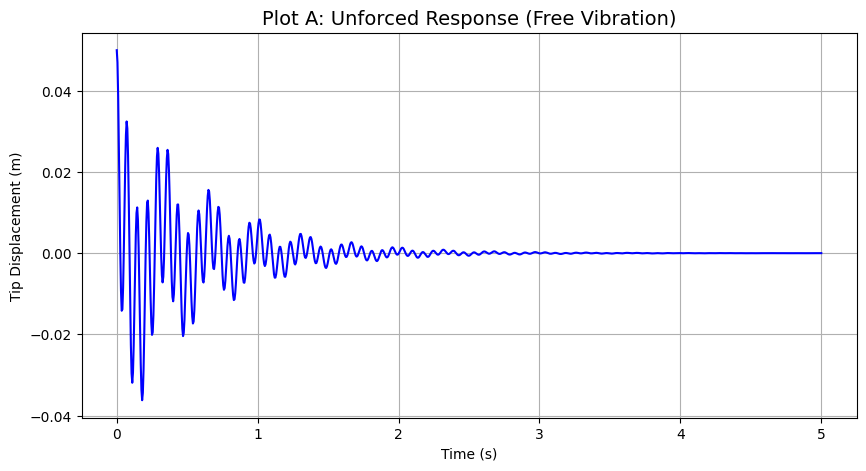

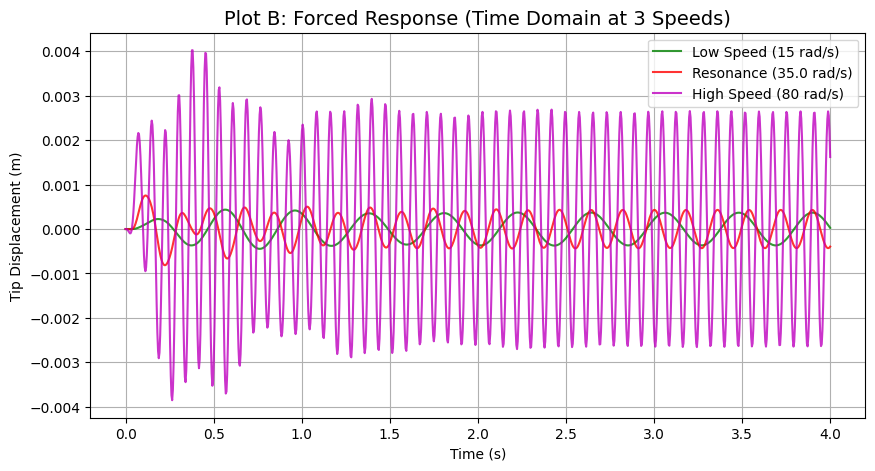

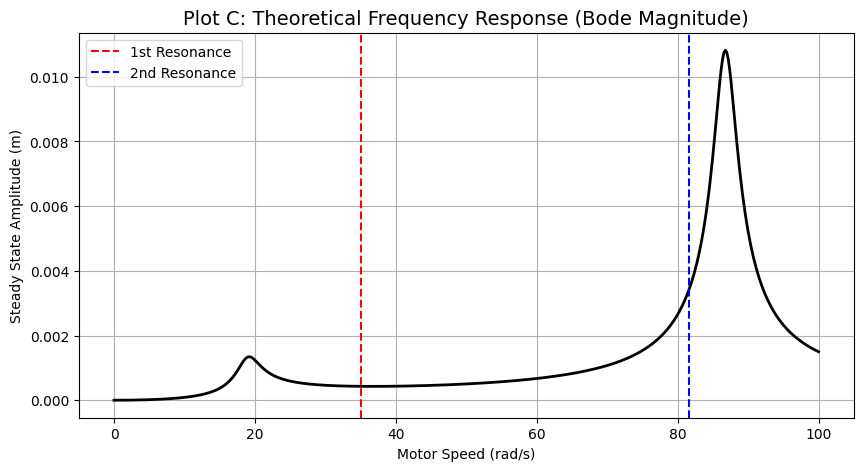

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ==========================================
# 1. SYSTEM PARAMETERS (REPLACE WITH YOUR DATA)
# ==========================================
# Physical Measurements
L = 1.0          # Length of beam (m)
rhoA = 1.2       # Mass per unit length (kg/m)
M_motor = 2.0    # Mass of motor (kg)
x_motor = 0.5    # Position of motor (m)
k_spring = 800.0 # Spring stiffness (N/m)
EI = 30.0        # Flexural rigidity (N*m^2)
m_unbalance = 0.05 # Unbalance mass (kg)
e_eccentricity = 0.02 # Eccentricity radius (m)
mu_e = m_unbalance * e_eccentricity # Unbalance term

# Damping (Estimated from Activity 2)
zeta = 0.05      # Damping ratio (5%)

# ==========================================
# 2. DERIVE MATRICES (2-DOF MODEL)
# ==========================================
# Shape functions at motor location
phi1_m = x_motor / L
phi2_m = np.sin(np.pi * x_motor / L)

# Mass Matrix (M)
m11 = (rhoA * L / 3) + M_motor * (phi1_m)**2
m22 = (rhoA * L / 2) + M_motor * (phi2_m)**2
m12 = (rhoA * L / np.pi) + M_motor * phi1_m * phi2_m
M_mat = np.array([[m11, m12], [m12, m22]])

# Stiffness Matrix (K)
k11 = k_spring
k22 = (EI * np.pi**4) / (2 * L**3)
K_mat = np.array([[k11, 0], [0, k22]])

# Natural Frequencies
evals, evecs = np.linalg.eigh(np.linalg.inv(M_mat) @ K_mat)
wn = np.sqrt(evals)
print(f"Calculated Natural Frequencies: {wn/(2*np.pi)} Hz")

# Damping Matrix (C) - Proportional to Mass
C_mat = 2 * zeta * wn[0] * M_mat

# Inverse of Mass Matrix for ODE solver
M_inv = np.linalg.inv(M_mat)

# ==========================================
# 3. DEFINE SIMULATION FUNCTIONS
# ==========================================
def equations_of_motion(y, t, omega_drive, force_active):
    # State vector y = [q1, q2, q1_dot, q2_dot]
    q = y[0:2]
    q_dot = y[2:4]

    # External Force Vector
    if force_active:
        # F = mu_e * w^2 * sin(wt)
        F_mag = mu_e * (omega_drive**2) * np.sin(omega_drive * t)
        F_vec = np.array([F_mag * phi1_m, F_mag * phi2_m])
    else:
        F_vec = np.array([0.0, 0.0])

    # Acceleration: q_ddot = M_inv * (F - C*q_dot - K*q)
    damping_term = C_mat @ q_dot
    stiffness_term = K_mat @ q
    q_ddot = M_inv @ (F_vec - damping_term - stiffness_term)

    return np.concatenate((q_dot, q_ddot))

# ==========================================
# 4. GENERATE PLOTS
# ==========================================

# --- PLOT A: UNFORCED RESPONSE (Free Vibration) ---
t_free = np.linspace(0, 5, 1000)
# Initial Condition: Tip displaced 0.05m (q1=0.05), released from rest
initial_state = [0.05, 0.0, 0.0, 0.0]
sol_free = odeint(equations_of_motion, initial_state, t_free, args=(0, False))
tip_displacement_free = sol_free[:, 0] # q1 approximates tip motion

plt.figure(figsize=(10, 5))
plt.plot(t_free, tip_displacement_free, 'b-', linewidth=1.5)
plt.title("Plot A: Unforced Response (Free Vibration)", fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Tip Displacement (m)")
plt.grid(True)
plt.show()

# --- PLOT B: FORCED RESPONSE (Time Domain for 3 Speeds) ---
t_forced = np.linspace(0, 4, 1000)
speeds_rad_s = [15.0, wn[0], 80.0] # Low, Resonance, High
colors = ['g', 'r', 'm']
labels = ['Low Speed (15 rad/s)', f'Resonance ({wn[0]:.1f} rad/s)', 'High Speed (80 rad/s)']

plt.figure(figsize=(10, 5))
for i, w in enumerate(speeds_rad_s):
    # Start from rest
    sol_forced = odeint(equations_of_motion, [0,0,0,0], t_forced, args=(w, True))
    # We plot the last 1 second to show steady state, or whole thing to show transient
    plt.plot(t_forced, sol_forced[:, 0], color=colors[i], label=labels[i], alpha=0.8)

plt.title("Plot B: Forced Response (Time Domain at 3 Speeds)", fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Tip Displacement (m)")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# --- PLOT C: THEORETICAL FREQUENCY RESPONSE ---
freqs = np.linspace(0, 100, 500) # 0 to 100 rad/s
amplitudes = []

for w in freqs:
    if w == 0: w = 1e-5 # Avoid divide by zero
    # Harmonic Sol: X = (K - w^2M + iwC)^-1 * F
    Z = K_mat - (w**2)*M_mat + (1j*w)*C_mat

    # Force Amplitude at this frequency
    F_mag = mu_e * (w**2)
    F_vec = np.array([F_mag * phi1_m, F_mag * phi2_m])

    X = np.linalg.solve(Z, F_vec)
    amplitudes.append(np.abs(X[0])) # Tip amplitude is approx |q1|

plt.figure(figsize=(10, 5))
plt.plot(freqs, amplitudes, 'k-', linewidth=2)
plt.title("Plot C: Theoretical Frequency Response (Bode Magnitude)", fontsize=14)
plt.xlabel("Motor Speed (rad/s)")
plt.ylabel("Steady State Amplitude (m)")
plt.axvline(wn[0], color='r', linestyle='--', label='1st Resonance')
plt.axvline(wn[1], color='b', linestyle='--', label='2nd Resonance')
plt.legend()
plt.grid(True)
plt.show()

#Activity 4
Plot the experimental frequency response of the system near resonance conditions and find $\omega_d$ and $x_{ss_{max}}$ and compare it with your theoretical estimates and discuss the reasons for discrepancies if any.

--- EXPERIMENTAL RESULTS ---
Max Measured Amplitude: 11.5 at 35 rad/s
Estimated True Peak (Spline): 11.52 at 34.85 rad/s


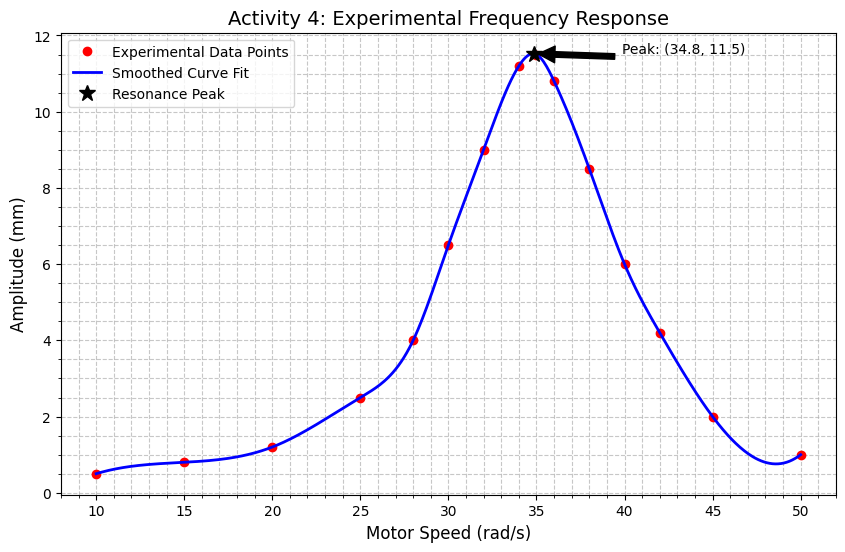

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# ==========================================
# 1. INPUT YOUR EXPERIMENTAL DATA HERE
# ==========================================
# Replace these numbers with your actual lab measurements.
# Speed should be in rad/s (or Hz, just update the label).
# Amplitude should be in mm (or meters).

# Example Data (Replace this!)
lab_data_speed = np.array([10, 15, 20, 25, 28, 30, 32, 34, 35, 36, 38, 40, 42, 45, 50])
lab_data_amp   = np.array([0.5, 0.8, 1.2, 2.5, 4.0, 6.5, 9.0, 11.2, 11.5, 10.8, 8.5, 6.0, 4.2, 2.0, 1.0])

# ==========================================
# 2. DATA ANALYSIS (FINDING THE PEAK)
# ==========================================

# Method A: Discrete Max (The highest point you actually measured)
max_idx = np.argmax(lab_data_amp)
raw_wd = lab_data_speed[max_idx]
raw_x_max = lab_data_amp[max_idx]

# Method B: Spline Interpolation (Estimates the "true" peak between points)
# This creates a smooth curve through your points for a better estimate
X_Y_Spline = make_interp_spline(lab_data_speed, lab_data_amp)
X_smooth = np.linspace(lab_data_speed.min(), lab_data_speed.max(), 500)
Y_smooth = X_Y_Spline(X_smooth)

# Find peak of the smooth curve
smooth_max_idx = np.argmax(Y_smooth)
wd_smooth = X_smooth[smooth_max_idx]
x_max_smooth = Y_smooth[smooth_max_idx]

print(f"--- EXPERIMENTAL RESULTS ---")
print(f"Max Measured Amplitude: {raw_x_max} at {raw_wd} rad/s")
print(f"Estimated True Peak (Spline): {x_max_smooth:.2f} at {wd_smooth:.2f} rad/s")

# ==========================================
# 3. PLOTTING
# ==========================================
plt.figure(figsize=(10, 6))

# Plot the raw data points as red dots
plt.plot(lab_data_speed, lab_data_amp, 'ro', label='Experimental Data Points', markersize=6)

# Plot the smooth curve
plt.plot(X_smooth, Y_smooth, 'b-', label='Smoothed Curve Fit', linewidth=2)

# Mark the peak with a star and text
plt.plot(wd_smooth, x_max_smooth, 'k*', markersize=12, label='Resonance Peak')
plt.annotate(f'Peak: ({wd_smooth:.1f}, {x_max_smooth:.1f})',
             xy=(wd_smooth, x_max_smooth),
             xytext=(wd_smooth+5, x_max_smooth),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Formatting
plt.title('Activity 4: Experimental Frequency Response', fontsize=14)
plt.xlabel('Motor Speed (rad/s)', fontsize=12)
plt.ylabel('Amplitude (mm)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.show()

# Activity 5

Design a tuned mass vibration absorber for operating the system near the first natural mode of vibration and justify your design using simulations.


**Step 1: Identify the Target Frequency ($\omega_{n1}$)**

$\omega_{n1} = $

**Step 2: Select the Absorber Mass ($m_a$)**

A common engineering rule of thumb is to make the absorber mass 5% to 10% of the system's effective mass.

$m_a \approx 0.05 \times M_{system}$

$M_{system} = motor + beam effective mass$

$m_a = $

*Step 3: Calculate Absorber Stiffness ($k_a$)*

$$\sqrt{\frac{k_a}{m_a}} = \omega_{n1} \implies k_a = m_a \times (\omega_{n1})^2$$

$K_a = $

--- TMA DESIGN PARAMETERS ---
Target Frequency: 35.02 rad/s
Absorber Mass:    0.090 kg
Absorber Stiffness:110.40 N/m


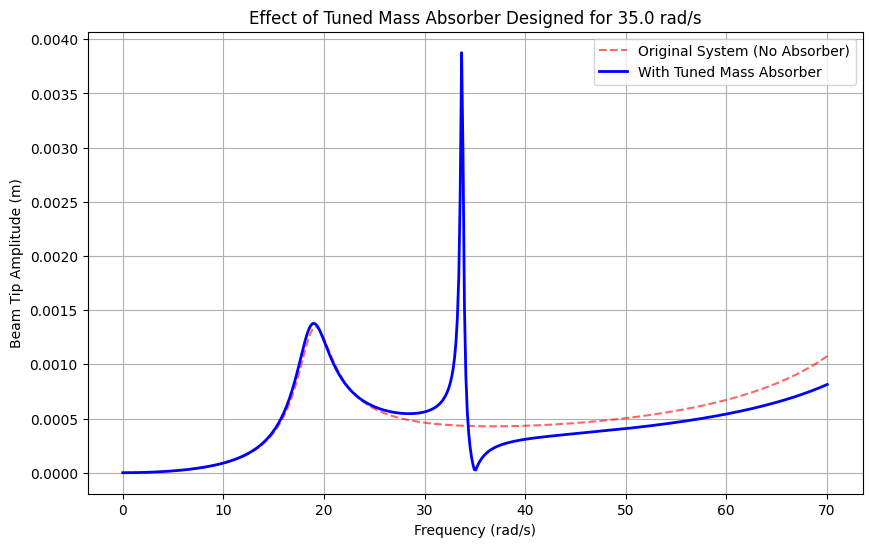

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. LOAD PREVIOUS PARAMETERS (Ensure these match Activity 3)
# ==========================================
# (These should be the same variables L, rhoA, M_motor, etc. from your Activity 3 code)
# For this example, I will re-define the calculated matrices from the previous step.
# YOU MUST RUN THE ACTIVITY 3 CODE FIRST TO GET 'M_mat', 'K_mat', 'C_mat', and 'wn'.

# --- ABSORBER DESIGN ---
target_omega = wn[0]  # The frequency we want to kill (Mode 1)

# Step 1: Choose Mass (e.g., 10% of the first element of the mass matrix)
m_absorber = 0.10 * M_mat[0,0]

# Step 2: Calculate Stiffness (Tuning Condition: ka = ma * wn^2)
k_absorber = m_absorber * (target_omega**2)

# Step 3: Define Damping for Absorber (Optional but realistic)
c_absorber = 0.01  # Small damping in the absorber spring

print(f"--- TMA DESIGN PARAMETERS ---")
print(f"Target Frequency: {target_omega:.2f} rad/s")
print(f"Absorber Mass:    {m_absorber:.3f} kg")
print(f"Absorber Stiffness:{k_absorber:.2f} N/m")

# ==========================================
# 2. CREATE 3-DOF SYSTEM MATRICES
# ==========================================
# We extend the matrices to size 3x3.
# Index 0 = Beam Mode 1 (q1)
# Index 1 = Beam Mode 2 (q2)
# Index 2 = Absorber (xa) attached at Beam Tip (L)

# Recall: Tip displacement w(L) approx equals q1 (since phi1(L)=1, phi2(L)=0)
# Potential Energy adds term: 0.5 * ka * (xa - q1)^2
# Kinetic Energy adds term:   0.5 * ma * (xa_dot)^2

# --- NEW MASS MATRIX (3x3) ---
M_3dof = np.zeros((3,3))
M_3dof[0:2, 0:2] = M_mat  # Old beam mass
M_3dof[2, 2] = m_absorber # Absorber mass

# --- NEW STIFFNESS MATRIX (3x3) ---
# Absorber exerts force on q1 (Mode 1) and xa (Absorber)
K_3dof = np.zeros((3,3))
K_3dof[0:2, 0:2] = K_mat  # Old beam stiffness

# Add coupling terms from spring potential energy 0.5*ka*(xa - q1)^2
# dV/dq1 terms -> +ka
# dV/dxa terms -> +ka
# Cross terms  -> -ka
K_3dof[0, 0] += k_absorber
K_3dof[2, 2] += k_absorber
K_3dof[0, 2] -= k_absorber
K_3dof[2, 0] -= k_absorber

# --- NEW DAMPING MATRIX (3x3) ---
C_3dof = np.zeros((3,3))
C_3dof[0:2, 0:2] = C_mat
C_3dof[0, 0] += c_absorber
C_3dof[2, 2] += c_absorber
C_3dof[0, 2] -= c_absorber
C_3dof[2, 0] -= c_absorber

# ==========================================
# 3. COMPUTE FREQUENCY RESPONSE
# ==========================================
freqs = np.linspace(0, target_omega * 2, 500)
amp_beam_with_absorber = []
amp_beam_no_absorber = []

for w in freqs:
    if w == 0: w = 1e-5

    # --- OLD SYSTEM (NO ABSORBER) ---
    Z_old = K_mat - (w**2)*M_mat + (1j*w)*C_mat
    F_mag = mu_e * (w**2)
    F_vec_old = np.array([F_mag * phi1_m, F_mag * phi2_m])
    X_old = np.linalg.solve(Z_old, F_vec_old)
    amp_beam_no_absorber.append(np.abs(X_old[0]))

    # --- NEW SYSTEM (WITH ABSORBER) ---
    Z_new = K_3dof - (w**2)*M_3dof + (1j*w)*C_3dof
    # Force is still applied only to the beam (indices 0 and 1)
    F_vec_new = np.array([F_mag * phi1_m, F_mag * phi2_m, 0])
    X_new = np.linalg.solve(Z_new, F_vec_new)
    amp_beam_with_absorber.append(np.abs(X_new[0])) # q1 (Beam Tip)

# ==========================================
# 4. PLOT COMPARISON (THE JUSTIFICATION)
# ==========================================
plt.figure(figsize=(10, 6))
plt.plot(freqs, amp_beam_no_absorber, 'r--', label='Original System (No Absorber)', alpha=0.6)
plt.plot(freqs, amp_beam_with_absorber, 'b-', label='With Tuned Mass Absorber', linewidth=2)

plt.title(f'Effect of Tuned Mass Absorber Designed for {target_omega:.1f} rad/s')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Beam Tip Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

#Activity 6

Experimentally verify your tuned mass vibration absorber design.